# **Airlines Satisfaction Prediction**

*--Qilan Lao*

Data: Airline Passenger Satisfaction | Kaggle  https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Goal: to establish the classification model to predict passengers' evaluation of flight experience

## Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

import warnings
warnings.filterwarnings("ignore")

## Loading the csv files into the pandas dataframe

In [ ]:
data_train=pd.read_csv("https://raw.githubusercontent.com/katelao/project1/main/train.csv")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
data_test=pd.read_csv("https://raw.githubusercontent.com/katelao/project1/main/test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
#union two tables
airline_data = pd.concat([data_train, data_test])

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

##Data Cleaning

In [ ]:
df=airline_data.copy()

In [ ]:
# Let's drop the fields "Unnamed: 0" and "id".
df.drop(columns = ['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [ ]:
# Count of missing values
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
# Percentage of missing values
round(df.isna().sum() /len(df) *100,2)

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.3
satisfaction                         0.0
dtype: float64

In [ ]:
# drop and NAs
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
# create new column to look for total delay of departure and arrival
df['Total Delay in Minutes']=df['Departure Delay in Minutes']+df['Arrival Delay in Minutes']
df=df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

In [ ]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565501
satisfied                  0.434499
Name: satisfaction, dtype: float64

In [ ]:
# Convert the statisfaction values into 1 and 0
df['satisfaction'] = df['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [ ]:
df['satisfaction'].values

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    12948

## Exploratory Data Analysis

#### Passenger's satisfaction in different Travel and different customers

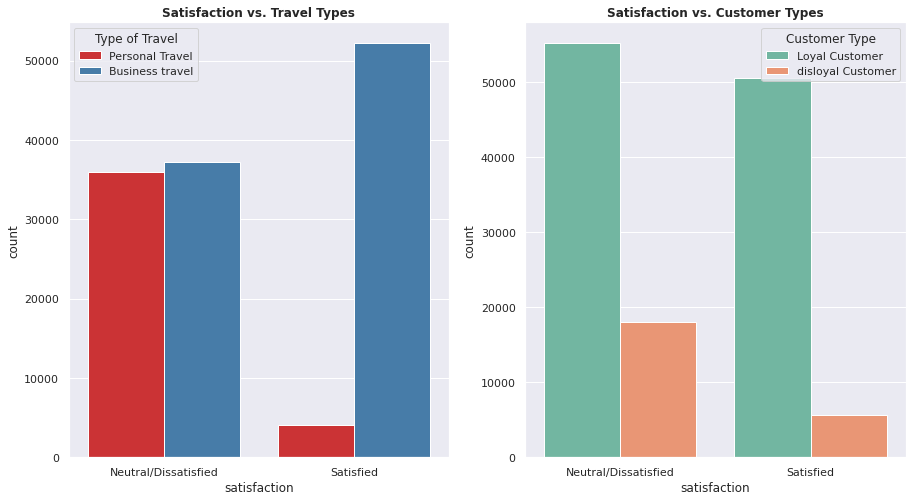

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(data=df,x='satisfaction', hue='Type of Travel', palette='Set1', ax=ax1)
ax1.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
ax1.set_title("Satisfaction vs. Travel Types", fontweight="bold")

sns.countplot(data=df,x='satisfaction',hue='Customer Type',palette='Set2', ax=ax2)
ax2.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
ax2.set_title("Satisfaction vs. Customer Types", fontweight="bold")
plt.show()

#### Age distribution of Passenger Satisfaction

--reference: https://www.delftstack.com/howto/seaborn/remove-legend-seaborn-plot/

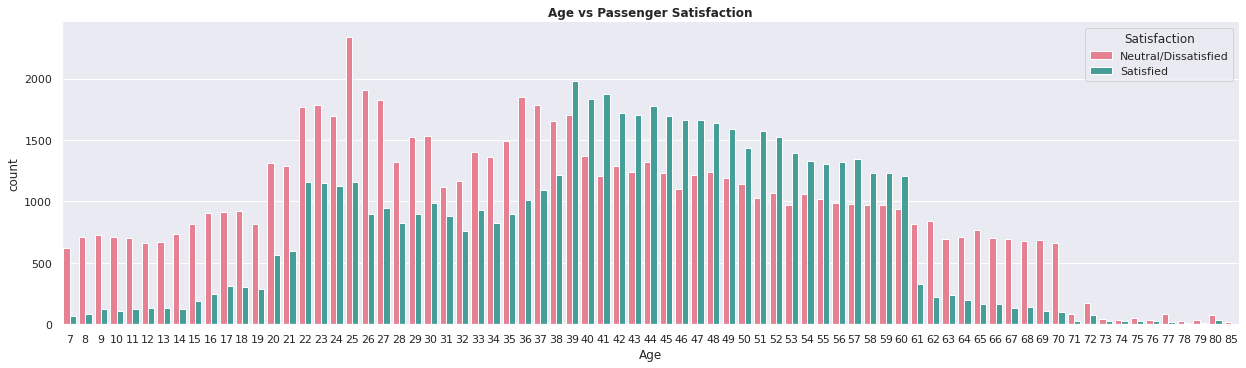

In [ ]:
g=sns.catplot(x="Age", data=df, hue='satisfaction', aspect=3.5, kind='count', palette='husl')
g._legend.remove()
plt.legend(['Neutral/Dissatisfied','Satisfied'], bbox_to_anchor=(1,1), title='Satisfaction')
plt.title('Age vs Passenger Satisfaction', fontweight="bold")
plt.show()

#### How the flight distance in a travel affect passengers' satisfactions by type of travels and class

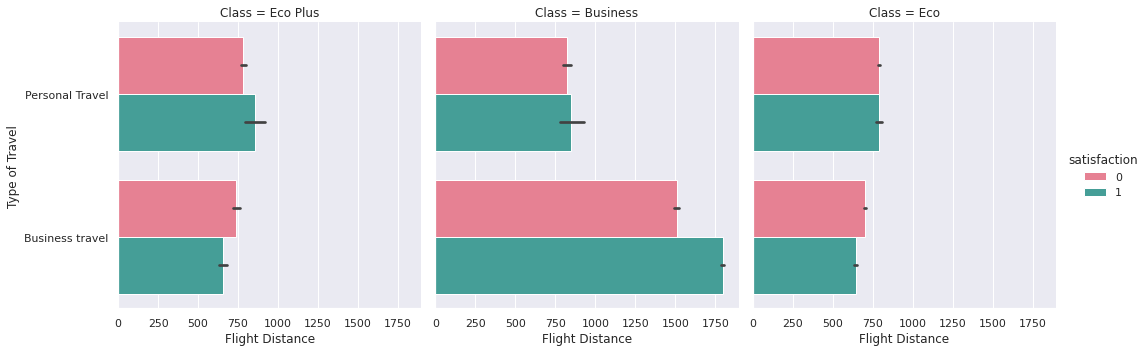

In [ ]:
sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction",
            col="Class", data=df, kind="bar", palette='husl')
plt.show()

#### Correlation

* We can see that Gate location is not related with our target feature, we can drop it in our prediction model.

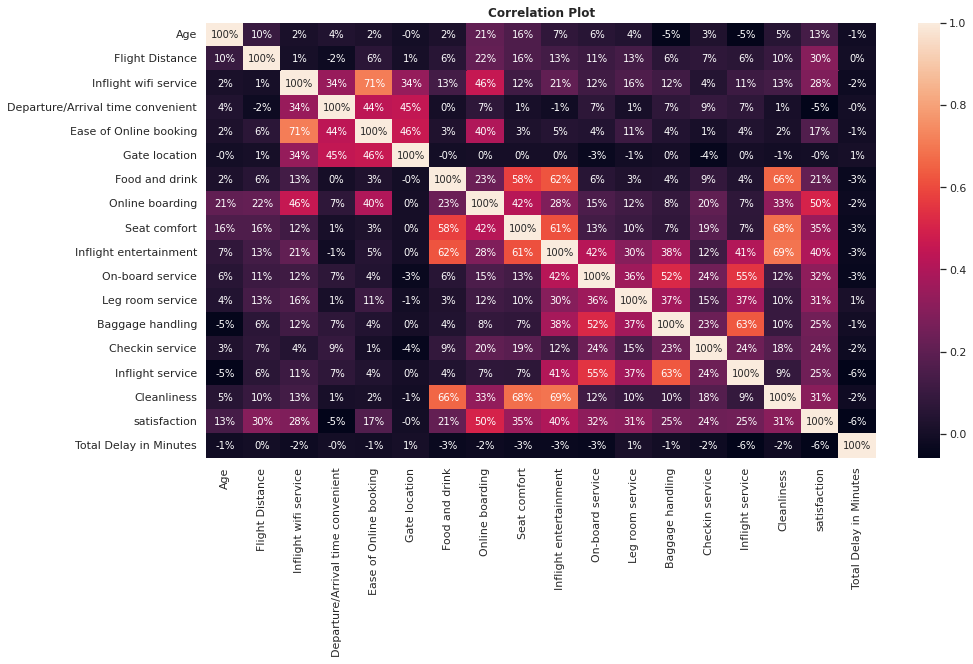

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt ='.0%')
plt.title("Correlation Plot", fontweight="bold")
plt.show()

## Prediction Models

In [ ]:
# import the  necessary libraries in the modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
df2=df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    12948

In [ ]:
# make the 4 object variables be the dummy variables
df2 = pd.get_dummies(df2,columns=['Gender','Customer Type','Type of Travel'],drop_first=True)
df2 = pd.get_dummies(df2,columns=['Class'])
df2.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,satisfaction,Total Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,0,43.0,1,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,0,7.0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,1,0.0,0,0,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,0,20.0,0,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,1,0.0,1,0,0,1,0,0


In [ ]:
#Separting the Features from the labels, Separating X from y
X = df2.drop(['satisfaction', 'Gate location'], axis = 1)
y = df2['satisfaction']

In [ ]:
#Splitting the dataset into training and test sets in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(90640, 22)

In [ ]:
X_test.shape

(38847, 22)

#### Logistic Regression

In [ ]:
# here we are calling Logistic Regression model 'lr'
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make prediction
lr_pred = lr.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
pd.DataFrame(confusion_matrix(y_test, lr_pred),
             columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
             index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])

,Predicted neutral_or_dissatisfied (0),Predicted satisfied (1)
Acutal neutral_or_dissatisfied (0),19886,2181
Actual satisfied (1),2776,14004


In [ ]:
# print classification report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22067
           1       0.87      0.83      0.85     16780

    accuracy                           0.87     38847
   macro avg       0.87      0.87      0.87     38847
weighted avg       0.87      0.87      0.87     38847



#### Decision Trees

In [ ]:
# Creating and Training the Decision Tree classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Taking a look at the different parameters of the model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Make prediction
dt_pred = dt.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
pd.DataFrame(confusion_matrix(y_test, dt_pred),
             columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
             index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])

,Predicted neutral_or_dissatisfied (0),Predicted satisfied (1)
Acutal neutral_or_dissatisfied (0),20910,1157
Actual satisfied (1),1037,15743


In [ ]:
# print classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22067
           1       0.93      0.94      0.93     16780

    accuracy                           0.94     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.94      0.94      0.94     38847



#### Random Forests

Reference:
sklearn.ensemble.RandomForestClassifier — scikit-learn 1.1.1 documentation  [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Training the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=2)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=2)

In [ ]:
# Predicting the Test set results
rf_pred = rf.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
pd.DataFrame(confusion_matrix(y_test, rf_pred),
             columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
             index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])

,Predicted neutral_or_dissatisfied (0),Predicted satisfied (1)
Acutal neutral_or_dissatisfied (0),21571,496
Actual satisfied (1),1235,15545


In [ ]:
# print classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22067
           1       0.97      0.93      0.95     16780

    accuracy                           0.96     38847
   macro avg       0.96      0.95      0.95     38847
weighted avg       0.96      0.96      0.96     38847



#### K-Nearest Neighbors

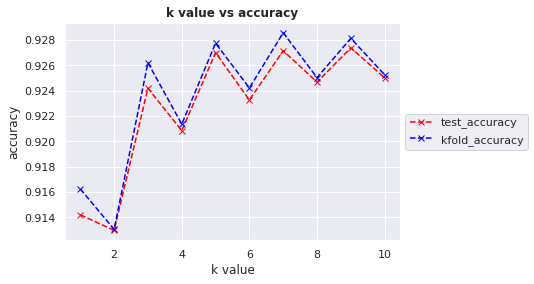

In [ ]:
# find optimal k
test_accuracy = []
kfold_accuracy =[]

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  knn_pred = knn.predict(X_test)

  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
  results = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

  test_accuracy.append(accuracy_score(y_test, knn_pred.ravel()))
  kfold_accuracy.append(results.mean())

plt.plot(list(range(1,11)), test_accuracy, color='red', linestyle='dashed', marker='x', label='test_accuracy')
plt.plot(list(range(1,11)), kfold_accuracy, color='blue', linestyle='dashed', marker='x', label='kfold_accuracy')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('k value vs accuracy', fontweight="bold")
plt.show()

In [ ]:
# Fitting (Training) the model to the training dataset
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Predicting the Test set results
knn_pred = knn.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
pd.DataFrame(confusion_matrix(y_test, knn_pred),
             columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
             index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])

,Predicted neutral_or_dissatisfied (0),Predicted satisfied (1)
Acutal neutral_or_dissatisfied (0),21320,747
Actual satisfied (1),2074,14706


In [ ]:
# print classification report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22067
           1       0.95      0.88      0.91     16780

    accuracy                           0.93     38847
   macro avg       0.93      0.92      0.93     38847
weighted avg       0.93      0.93      0.93     38847



#### Naive Bayes

In [ ]:
#We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
# Predicting the Test set results
gnb_pred = gnb.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
pd.DataFrame(confusion_matrix(y_test, gnb_pred),
             columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
             index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])

,Predicted neutral_or_dissatisfied (0),Predicted satisfied (1)
Acutal neutral_or_dissatisfied (0),19511,2556
Actual satisfied (1),3346,13434


In [ ]:
# print classification report
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     22067
           1       0.84      0.80      0.82     16780

    accuracy                           0.85     38847
   macro avg       0.85      0.84      0.84     38847
weighted avg       0.85      0.85      0.85     38847



#### Support Vector Machines

In [ ]:
# Below we are experimenting with various SVMs and different parameters
# (processing time is about 45min to 1hr since it walks through more decision points with c=1)
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
# Performing Stratified 5-Fold Cross Validation
def accfold_input(m):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
  result = cross_val_score(m, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
  print(f' Avg accuracy:{result.mean()}')

In [ ]:
# the processing time is very slow also (2hrs to 3hrs)
accfold_input(linear)
accfold_input(rbf)
accfold_input(poly)
accfold_input(sig)

 Avg accuracy:0.876963812886143
 Avg accuracy:0.8264232127096205
 Avg accuracy:0.9367828773168579
 Avg accuracy:0.7815864960282436


In [ ]:
# Predicting the Test set results
poly_pred = poly.predict(X_test)
linear_pred = linear.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [ ]:
# Generating the confusion matrix using scikit-learn's confusion matrix method in dataframe
svm_prediction = [poly_pred, linear_pred, rbf_pred, sig_pred]

for ker in svm_prediction:
  pd.DataFrame(confusion_matrix(y_test, ker),
                 columns = ['Predicted neutral_or_dissatisfied (0)', 'Predicted satisfied (1)'],
                 index = ['Acutal neutral_or_dissatisfied (0)', 'Actual satisfied (1)'])
  print(classification_report(y_test, ker))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22067
           1       0.94      0.91      0.93     16780

    accuracy                           0.94     38847
   macro avg       0.94      0.93      0.94     38847
weighted avg       0.94      0.94      0.94     38847

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22067
           1       0.88      0.83      0.85     16780

    accuracy                           0.87     38847
   macro avg       0.87      0.87      0.87     38847
weighted avg       0.87      0.87      0.87     38847

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     22067
           1       0.98      0.64      0.77     16780

    accuracy                           0.84     38847
   macro avg       0.88      0.81      0.82     38847
weighted avg       0.87      0.84      0.83     38847

              preci

In [ ]:
# finally choosing poly_pred and print its classification report
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22067
           1       0.94      0.91      0.93     16780

    accuracy                           0.94     38847
   macro avg       0.94      0.93      0.94     38847
weighted avg       0.94      0.94      0.94     38847



## Models Evaluation

#### 5-fold Cross Validation and classification metrics for 6 models

In [ ]:
# Performing Stratified 5-Fold Cross Validation for each model
cv_models = [lr, dt, rf, knn, gnb, poly]
cv_accuracy = []
for m in cv_models:
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
  result = cross_val_score(m, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
  cv_accuracy.append(float('{:.3f}'.format(result.mean())))

print(cv_accuracy)

[0.875, 0.944, 0.957, 0.928, 0.85, 0.937]


In [ ]:
# find four metrics from each predicted model
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

pred_models = [lr_pred, dt_pred, rf_pred, knn_pred, gnb_pred, poly_pred]

accuracy=[]
precision=[]
recall=[]
f1=[]

for i in pred_models:
  accuracy.append(float('{:.3f}'.format(accuracy_score(y_test, i))))
  precision.append(float('{:.3f}'.format(precision_score(y_test, i, average="weighted"))))
  recall.append(float('{:.3f}'.format(recall_score(y_test, i, average="weighted"))))
  f1.append(float('{:.3f}'.format(f1_score(y_test, i, average="weighted"))))

In [ ]:
print(accuracy)
print(precision)
print(recall)
print(f1)

[0.872, 0.944, 0.955, 0.927, 0.848, 0.937]
[0.872, 0.944, 0.956, 0.929, 0.848, 0.937]
[0.872, 0.944, 0.955, 0.927, 0.848, 0.937]
[0.872, 0.944, 0.955, 0.927, 0.848, 0.937]


#### Classification_Metrics and cross validation_Graph

In [ ]:
# make lists into dataframe
model_name = ['Logistic_Regression','Decision_Trees','Random_Forest','KNN', 'Naive_Bayes', 'Support_Vector_Machines']
metric_scoring = ['Accuracy','Precision','Recall', 'F1', 'CV_Accuracy']
score = [accuracy, precision, recall, f1, cv_accuracy]

model_df = pd.DataFrame(score, index=metric_scoring, columns=model_name).T
model_df

,Accuracy,Precision,Recall,F1,CV_Accuracy
Logistic_Regression,0.872,0.872,0.872,0.872,0.875
Decision_Trees,0.944,0.944,0.944,0.944,0.944
Random_Forest,0.955,0.956,0.955,0.955,0.957
KNN,0.927,0.929,0.927,0.927,0.928
Naive_Bayes,0.848,0.848,0.848,0.848,0.850
Support_Vector_Machines,0.937,0.937,0.937,0.937,0.937


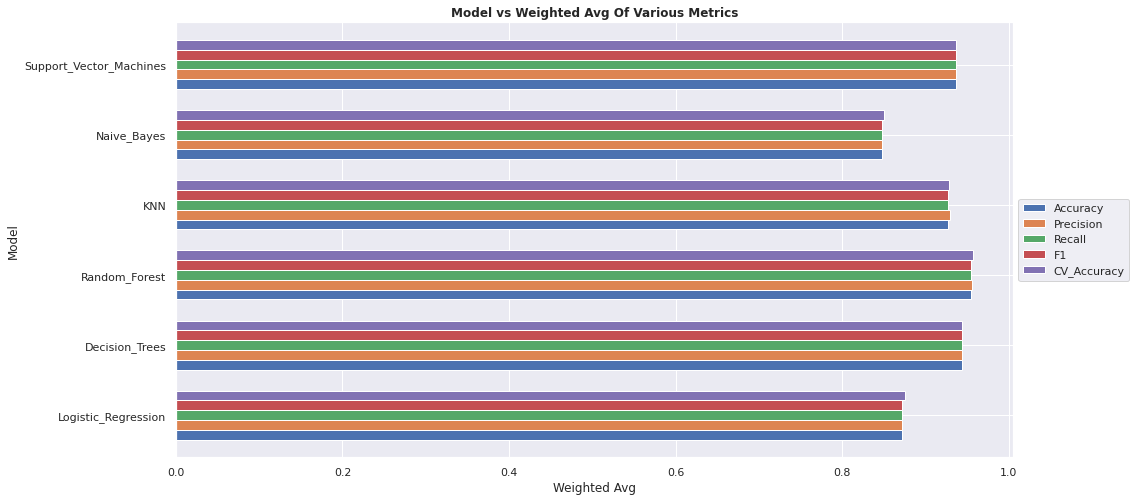

In [ ]:
model_df.plot(kind='barh', figsize=(15,8), width=0.7)

#plt.xticks(rotation=0)
plt.ylabel("Model")
plt.xlabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics", fontweight='bold')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Random Forest Feature Importance

* Random Forest Feature Importance is plotted to understand which feature scores to adjust
* Good Inflight Wifi service is crucial for customer satisfaction for both economy/business class customers
* Ease of online booking is important to business class customers

In [ ]:
rf.feature_importances_

array([0.03484145, 0.028589  , 0.1381782 , 0.02037777, 0.04193606,
       0.00970366, 0.13991775, 0.03459506, 0.09073888, 0.03538956,
       0.02742278, 0.01851048, 0.02830039, 0.01816879, 0.02437004,
       0.01653007, 0.00416269, 0.04973439, 0.10021445, 0.08851037,
       0.04764412, 0.00216403])

In [ ]:
df_impt = pd.DataFrame({'features':X.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=True)
df_impt

,features,importance
21,Class_Eco Plus,0.002164
16,Gender_Male,0.004163
5,Food and drink,0.009704
15,Total Delay in Minutes,0.016530
13,Inflight service,0.018169
11,Baggage handling,0.018510
3,Departure/Arrival time convenient,0.020378
14,Cleanliness,0.024370
10,Leg room service,0.027423
12,Checkin service,0.028300


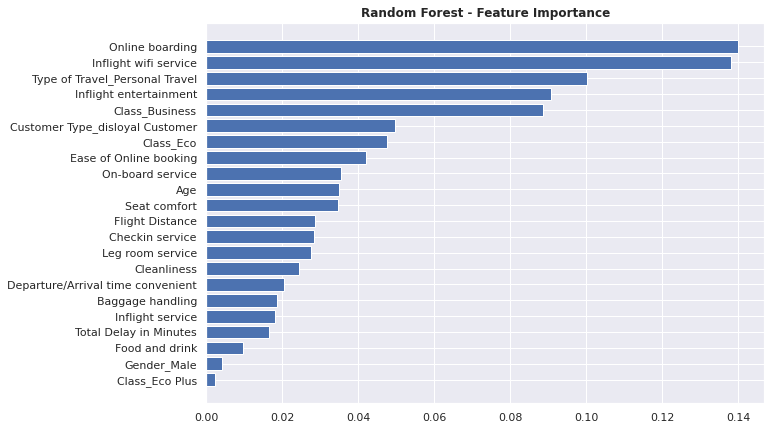

In [ ]:
fig = plt.figure(figsize=[10,7])
ax = plt.barh(df_impt['features'],df_impt['importance'])
plt.title('Random Forest - Feature Importance',weight='bold')
plt.show()